**Objective** :

This project aims at building a complete data science project which analyzes the listing of consumer complaints filed against Insurance companies licensed in Connecticut. This dataset includes the Company, Line of Business, nature of complaint, outcome or resolution, and recovery.

This application can be used by any agency, Insurance industry stakeholders, or the general public to predict the status of consumer filings against the insurance companies.

This is a complete data-driven application that considers the existing data to predict the Status of the Consumer complaints.

##### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Reading the dataframe

In [4]:
df=pd.read_csv("Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv")
df.head()

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,Cigna Health and Life Insurance Company,7015934,07/11/2018,08/13/2018,Group,Health Only,Marketing & Sales,Misrepresentation,Claim Settled,Furnished Information,0.00,Closed
1,Cigna Health and Life Insurance Company,7013129,02/22/2019,03/18/2019,Individual,Dental,Claim Handling,Unsatisfactory Settlement/Offer,Company Position Substantiated,Furnished Information,0.00,Closed
2,Cigna Health and Life Insurance Company,7014049,01/25/2019,02/22/2019,Group,Health Only,Claim Handling,Delays,Claim Settled,Justified,593.37,Closed
3,Cigna Health and Life Insurance Company,7013857,01/23/2019,01/23/2019,Group,Health Only,Claim Handling,UR Case Management,NaN,Furnished Information,0.00,Closed
4,Cigna Health and Life Insurance Company,7013857,01/23/2019,01/23/2019,Group,Health Only,Claim Handling,UR Case Management,NaN,Refer-Judicial/Attorney,0.00,Closed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24842 entries, 0 to 24841
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      24842 non-null  object 
 1   File No.     24842 non-null  int64  
 2   Opened       24842 non-null  object 
 3   Closed       23989 non-null  object 
 4   Coverage     22994 non-null  object 
 5   SubCoverage  17880 non-null  object 
 6   Reason       22637 non-null  object 
 7   SubReason    22637 non-null  object 
 8   Disposition  15505 non-null  object 
 9   Conclusion   21215 non-null  object 
 10  Recovery     24842 non-null  float64
 11  Status       24842 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.3+ MB


##### Displaying Unique values in respective columns 

In [6]:
df.nunique()

Company          709
File No.       15800
Opened          1234
Closed          1100
Coverage          43
SubCoverage       87
Reason             4
SubReason        147
Disposition       10
Conclusion        48
Recovery        2044
Status            22
dtype: int64

Inferences:

We can see that the columns Company, File No. has 709, 15800 unique values respectively

In [7]:
#printing the shape of the dataframe
print(df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

(24842, 12)
Number of rows: 24842
Number of columns: 12


#### Null Values in Dataset

In [8]:
#Displaying null values in the dataset with respect to the columns
df.isna().sum()

Company           0
File No.          0
Opened            0
Closed          853
Coverage       1848
SubCoverage    6962
Reason         2205
SubReason      2205
Disposition    9337
Conclusion     3627
Recovery          0
Status            0
dtype: int64

Inferences: 

The columns Closed, Coverage, Sub Coverage has 853, 1848, 6962 null values respectively.

#### Imputing Null Values in the dataset

In [9]:
df.fillna(df['Closed'].mode()[0], inplace=True)
df.fillna(df['Coverage'].mode()[0], inplace=True)
df.fillna(df['SubCoverage'].mode()[0], inplace=True)
df.fillna(df['Reason'].mode()[0], inplace=True)
df.fillna(df['SubReason'].mode()[0], inplace=True)
df.fillna(df['Disposition'].mode()[0], inplace=True)
df.fillna(df['Conclusion'].mode()[0], inplace=True)

#### Mapping various intermediate Status types to Open/pending and others to closed in Status Column 

In [10]:
df["Status"] = np.where(df["Status"] == "Closed", 0, 1)
df['Status'] = df['Status'].map({1:'Open/Pending', 0:'Closed'})

In [11]:
df = df[df.Reason != '02/23/2022']
df = df[df.Coverage != '02/23/2022']
df = df[df.SubCoverage != '02/23/2022']
df = df[df.Disposition != '02/23/2022']
df = df[df.Conclusion != '02/23/2022']

##### Summary of numerical columns

In [12]:
#Displaying summary of numerical columns
df.describe()

,File No.,Recovery
count,1.126600e+04,11266.000000
mean,7.017677e+06,985.167081
std,1.376488e+04,9247.913518
min,7.000002e+06,0.000000
25%,7.007318e+06,0.000000
50%,7.014266e+06,0.000000
75%,7.020789e+06,0.000000
max,7.045700e+06,311596.730000


Inferences: 
    
We can see that the values in Recovery column  is 80. The recoveries are ranging from 0 to $843825.

In [13]:
#Displaying the description of all columns
df.describe(include = 'all')

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
count,11266,1.126600e+04,11266,11266,11266,11266,11266,11266,11266,11266,11266.000000,11266
unique,478,NaN,1156,1093,23,69,4,120,10,43,NaN,2
top,"Anthem Health Plans, Inc",NaN,06/21/2019,02/23/2022,Private Passenger,Liability,Claim Handling,Denial of Claim,Company Position Substantiated,Unjustified,NaN,Closed
freq,1251,NaN,58,92,3475,2201,8770,1916,4891,4604,NaN,11178
mean,NaN,7.017677e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,985.167081,NaN
std,NaN,1.376488e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9247.913518,NaN
min,NaN,7.000002e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,7.007318e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,7.014266e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,7.020789e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


Inferences: 

The statistics of all the columns are displayed.

###### Displaying Complaints filed by Year

In [14]:
df['Filed_Year']=pd.to_datetime(df['Opened']).dt.year
df['Filed_Month']=pd.to_datetime(df['Opened']).dt.month
df['Settled_Year']=pd.to_datetime(df['Closed']).dt.year
df['Settled_Month']=pd.to_datetime(df['Closed']).dt.month

Text(0, 0.5, 'Count')

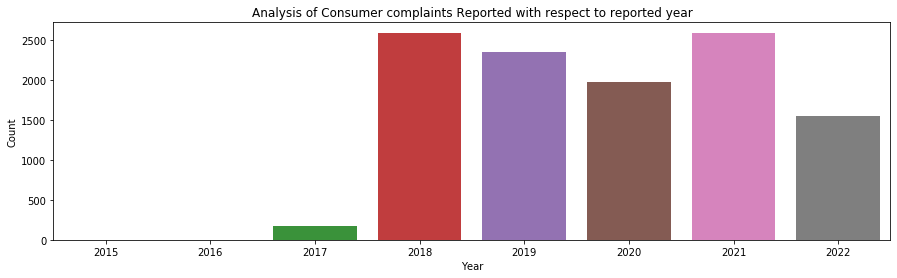

In [15]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="Filed_Year")
plt.title('Analysis of Consumer complaints Reported with respect to reported year')
plt.xlabel('Year')
plt.ylabel('Count')

Inferences: 

2021, 2018 are the years with most consumer complaints reported.

###### Displaying Complaints filed by Month

Text(0, 0.5, 'Count')

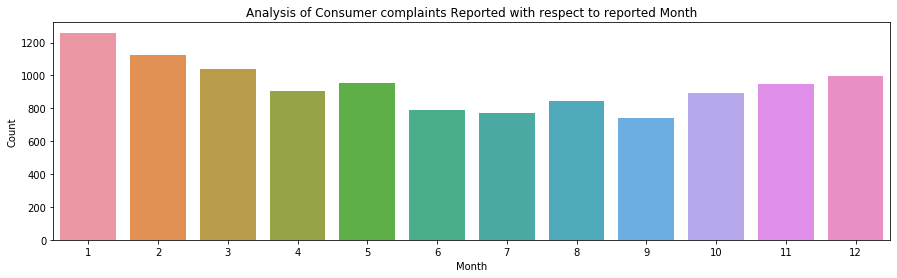

In [16]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="Filed_Month")
plt.title('Analysis of Consumer complaints Reported with respect to reported Month')
plt.xlabel('Month')
plt.ylabel('Count')

Inferences: 

January is month with most consumer complaints reported.

###### Displaying Complaints filed by Resolved Year

Text(0, 0.5, 'Count')

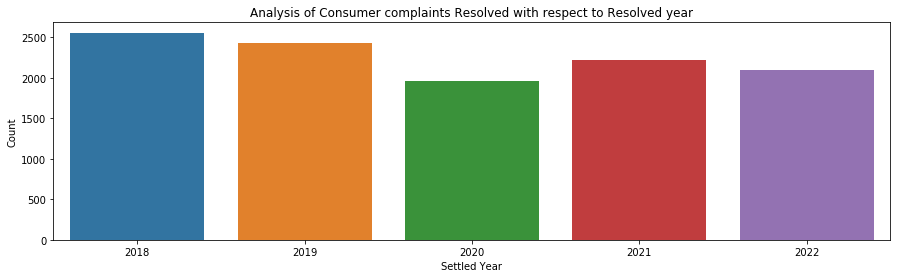

In [17]:
df['Settled_Year'] = df['Settled_Year'].astype(int)
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="Settled_Year")
plt.title('Analysis of Consumer complaints Resolved with respect to Resolved year')
plt.xlabel('Settled Year')
plt.ylabel('Count')


Inferences: 

2018, 2021 are the years with most consumer complaints settled/resolved.

###### Displaying Complaints filed by Resolved Month

Text(0, 0.5, 'Count')

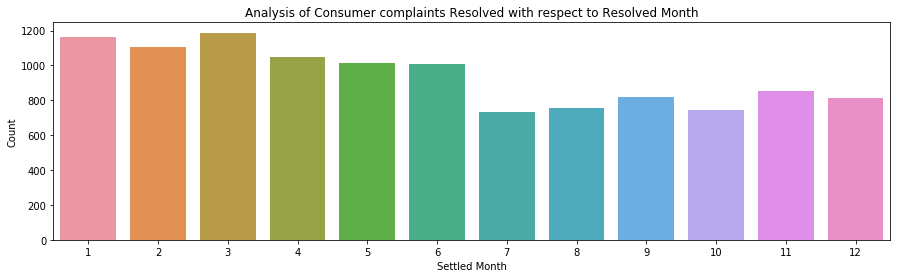

In [18]:
df['Settled_Month'] = df['Settled_Month'].astype(int)
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="Settled_Month")
plt.title('Analysis of Consumer complaints Resolved with respect to Resolved Month')
plt.xlabel('Settled Month')
plt.ylabel('Count')


Inferences: 

March, January are the months with most consumer complaints resolved.

##### Plotting the bar garph for Coverage Type and its individual counts

Text(0, 0.5, 'Count')

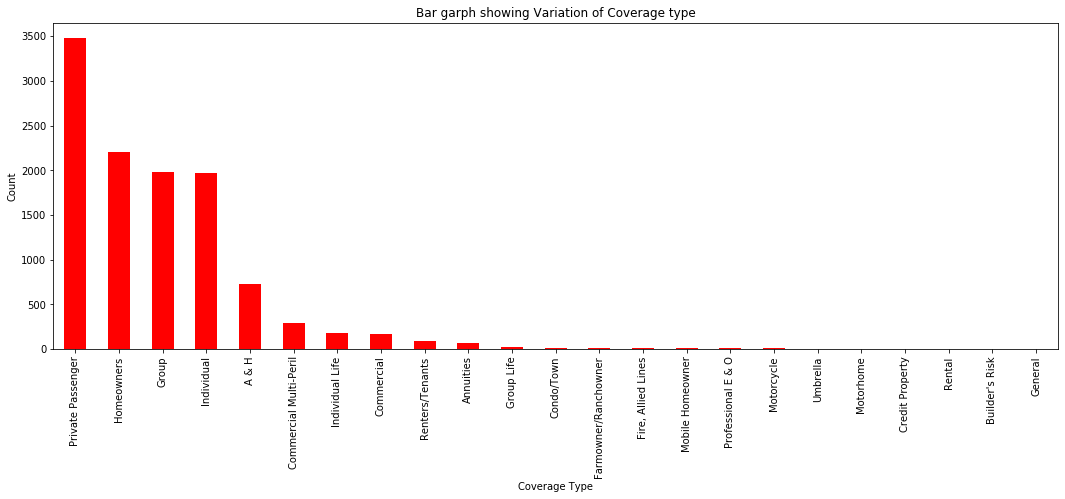

In [19]:
plt.figure(figsize=(18,6))
df['Coverage'].value_counts().plot(kind='bar', color='r')
plt.title('Bar garph showing Variation of Coverage type')
plt.xlabel('Coverage Type')
plt.ylabel('Count')

Inferences: 

Travel Insurances and Home insurances are the most sought after insurance policies.

##### Plotting the bar garph for Disposition Types

Text(0, 0.5, 'Count')

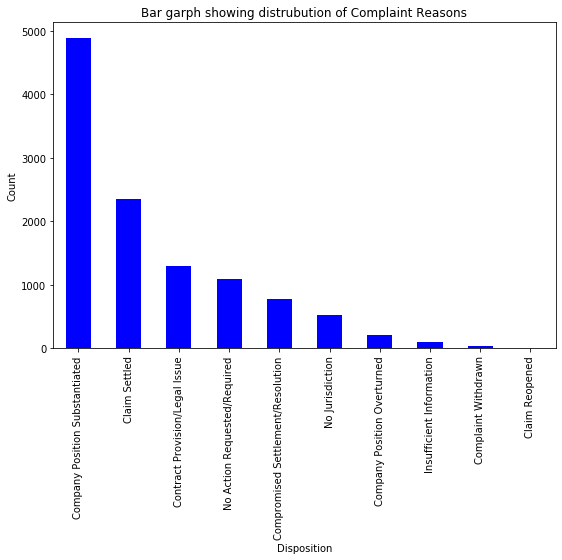

In [20]:
plt.figure(figsize=(9,6))
df['Disposition'].value_counts().plot(kind='bar', color='b')
plt.title('Bar garph showing distrubution of Complaint Reasons')
plt.xlabel('Disposition')
plt.ylabel('Count')

Inferences:
    
We can see that the disposition type Company Position Substantiated has the highest values in the dataset

##### Plotting the bar garph for Claim Reasons

Text(0, 0.5, 'Count')

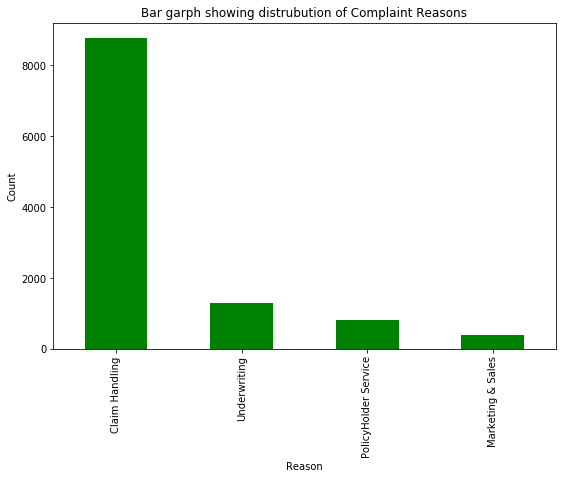

In [21]:
plt.figure(figsize=(9,6))
df['Reason'].value_counts().plot(kind='bar', color='g')
plt.title('Bar garph showing distrubution of Complaint Reasons')
plt.xlabel('Reason')
plt.ylabel('Count')

Inferences: 

The improper claim settlemets are the primary reason for complaint filings.

##### Depicting the reasons and their percent of share in complaint filings

Text(0.5, 1.0, 'Bar garph showing distrubution of Complaint Reasons')

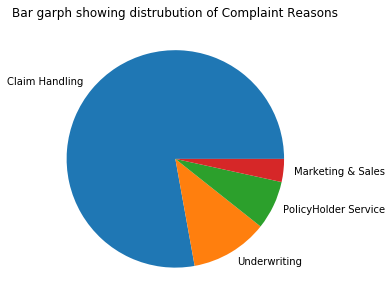

In [22]:
status_counts=df.Reason.value_counts()
plt.figure(figsize=(10,5))
plt.pie(status_counts,labels=status_counts.index);
plt.title('Bar garph showing distrubution of Complaint Reasons')


Inferences: 

The improper claim settlemets are the primary reason for complaint filings.

##### Plottings the variation of Complaint status vs Filed Year.

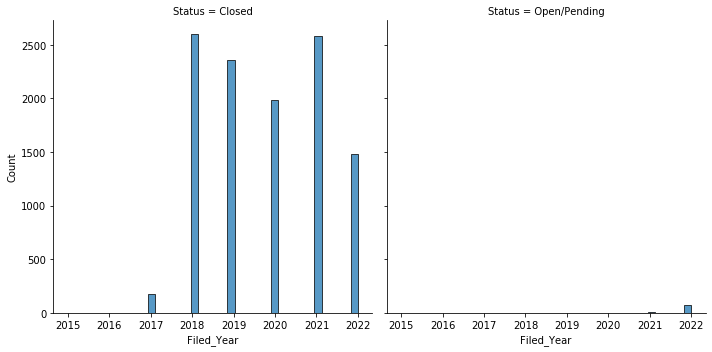

In [23]:
sns.displot(df, x="Filed_Year", col="Status")


Inferences: 

2021 is the year with most complaints filed and 2022 is the year with most of them resolved.

##### Plotting the variation in Reasons vs recovered amounts

Text(0.5, 1.0, 'Bar garph showing the variation in Reasons vs recovered amounts')

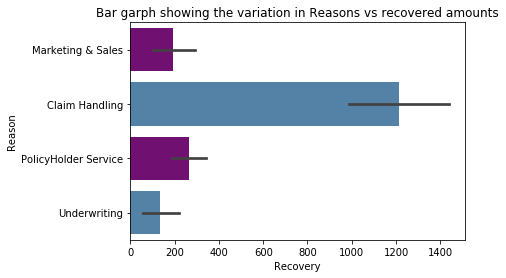

In [24]:
sns.barplot(x='Recovery', y='Reason', data=df,
            palette=['purple', 'steelblue'])
plt.title('Bar garph showing the variation in Reasons vs recovered amounts')


Inferences: 

Claim handling segment is the most highest segmnet with high recovery amounts then followed by complaints due to marketing and sales segments.

##### Graph showing the variations of Recovey Amounts with respect to Reported_Year

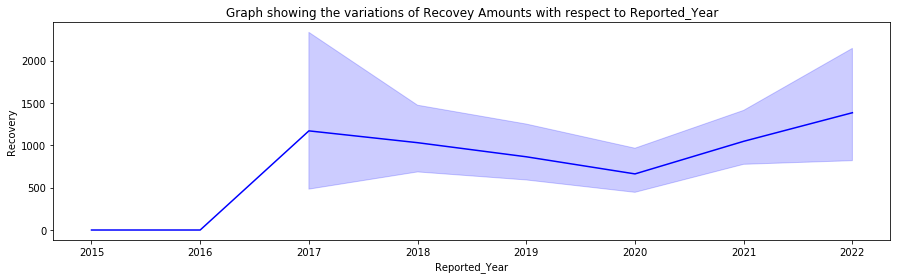

In [25]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Filed_Year',y='Recovery', data =df, color = 'b')
plt.title("Graph showing the variations of Recovey Amounts with respect to Reported_Year")
plt.xlabel("Reported_Year")
plt.show()

Inferences: 

2018 is the year with highest sum of claims recovered.

##### Graph showing the variations of Recovey Amounts with respect to Reported_Month

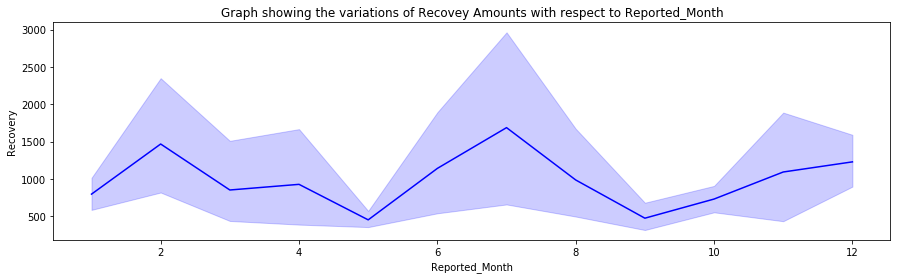

In [26]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Filed_Month',y='Recovery', data =df, color = 'b')
plt.title("Graph showing the variations of Recovey Amounts with respect to Reported_Month")
plt.xlabel("Reported_Month")
plt.show()

Inferences: 

February is the Month with highest sum of claims recovered.

##### Graph showing the distribution of Recovery amounts

Text(0.5, 1.0, 'Graph showing the distribution of Recovery amounts')

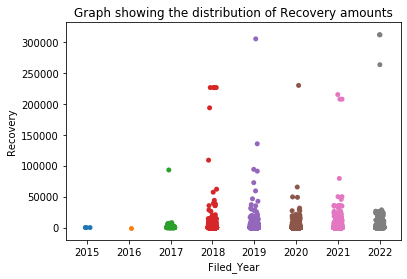

In [27]:
sns.stripplot(x='Filed_Year',y='Recovery',data=df)
plt.title('Graph showing the distribution of Recovery amounts')

##### Graph showing the variation if compaint status vs Recovery amounts and Reason filed

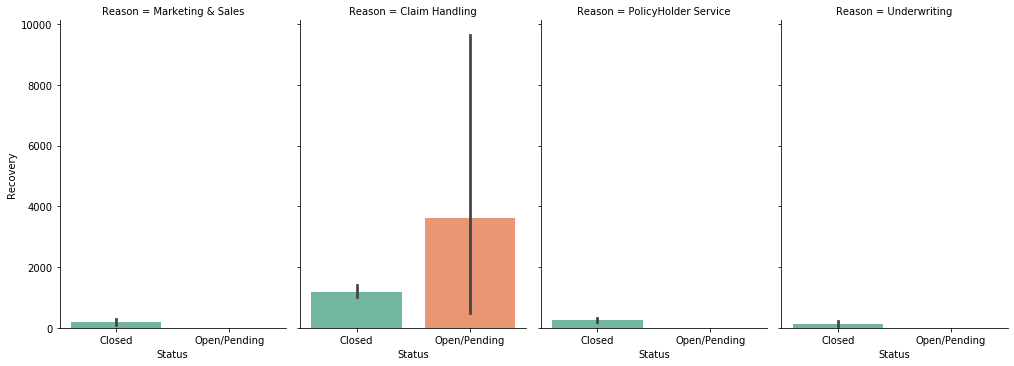

In [28]:
sns.catplot(x='Status',y='Recovery', col = 'Reason', data=df,kind='bar', aspect=.7, palette='Set2') 

Inferences: 
    
We can see that the most of the compaints are resolved with the highest recovery amounts in Claim handling category.

In [29]:
# Removing columns that are not used in our analysis.
df = df.drop('File No.', axis=1)
df = df.drop('Opened', axis=1)
df = df.drop('Closed', axis=1)

##### Coorelation matrix

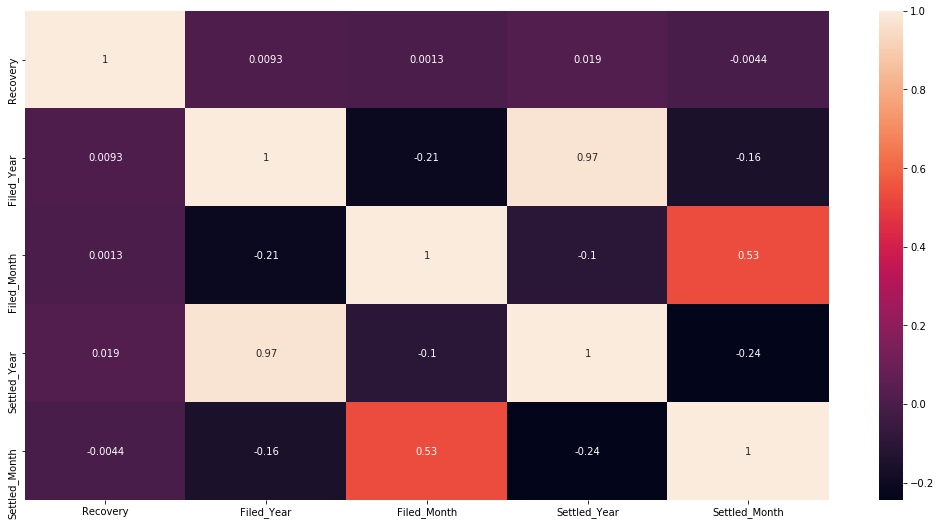

In [30]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True)

In [31]:
df = df[df.Reason != '02/23/2022']
df = df[df.Coverage != '02/23/2022']
df = df[df.SubCoverage != '02/23/2022']
df = df[df.Disposition != '02/23/2022']
df = df[df.Conclusion != '02/23/2022']

In [32]:
df['Company'].value_counts()[:25].index.tolist()

['Anthem Health Plans, Inc',
 'ConnectiCare Insurance Company, Inc',
 'UnitedHealthcare Insurance Company',
 'ConnectiCare Benefits, Inc.',
 'Progressive Direct Insurance Company',
 'Allstate Fire and Casualty Insurance Company',
 'Cigna Health and Life Insurance Company',
 'Progressive Casualty Insurance Company',
 'State Farm Fire & Casualty Company',
 'State Farm Mutual Automobile Insurance Company',
 'Oxford Health Plans (CT), Inc',
 'GEICO General Insurance Company',
 'Transamerica Life Insurance Company',
 'Allstate Insurance Company',
 'SAFECO Insurance Company of Illinois',
 'LM General Insurance Company',
 'Brighthouse Life Insurance Company',
 'GEICO Indemnity Company',
 'ConnectiCare Inc',
 'Travelers Home and Marine Insurance Company (The)',
 'Genworth Life Insurance Company',
 'American Commerce Insurance Company',
 'Metropolitan Life Insurance Company',
 'USAA Casualty Insurance Company',
 'Standard Fire Insurance Company (The)']

##### Data Cleaning : Removing unwanted data from the dataframe

In [33]:
df=df[np.isin(df.Company, ['Anthem Health Plans, Inc',
 'ConnectiCare Insurance Company, Inc',
 'UnitedHealthcare Insurance Company',
 'ConnectiCare Benefits, Inc.',
 'Progressive Direct Insurance Company',
 'Allstate Fire and Casualty Insurance Company',
 'Cigna Health and Life Insurance Company',
 'Progressive Casualty Insurance Company',
 'State Farm Fire & Casualty Company',
 'State Farm Mutual Automobile Insurance Company',
 'Oxford Health Plans (CT), Inc',
 'GEICO General Insurance Company',
 'Transamerica Life Insurance Company',
 'Allstate Insurance Company',
 'SAFECO Insurance Company of Illinois',
 'LM General Insurance Company',
 'Brighthouse Life Insurance Company',
 'GEICO Indemnity Company',
 'ConnectiCare Inc',
 'Travelers Home and Marine Insurance Company (The)',
 'Genworth Life Insurance Company',
 'American Commerce Insurance Company',
 'Metropolitan Life Insurance Company',
 'USAA Casualty Insurance Company',
 'Standard Fire Insurance Company (The)'])]

### Feature Engineering & Feature Selection 

##### Treating & Outliers Removal

Outlier: A data point in a data set that is far from all other observations is known as an outlier.

Outliers can be treated using 

1.Using boxplots

2.Using scatter plots

3.Using Z score

4.Using the IQR interquartile range

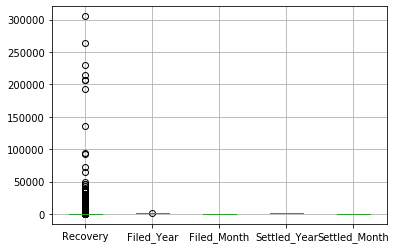

In [34]:
boxplot = df.boxplot()  

Here, We employ IQR interquartile range method to detect outliers. The outliers can be seen in above box graph. IQR is the first quartile subtracted from the third quartile. Anything that lies above or below the IQR is an outlier

In [35]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [36]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

##### One-hot encoding

One hot encoding, which improves predictions and classification accuracy of a model, is the crucial process of changing the categorical data variables into Numeric variables which are further fed to machine and deep learning algorithms.

In [37]:
df['Status'] = df['Status'].map({'Open/Pending':1, 'Closed':0})
df = pd.get_dummies(df, drop_first=True)
df

,Recovery,Status,Filed_Year,Filed_Month,Settled_Year,Settled_Month,Company_Allstate Insurance Company,Company_American Commerce Insurance Company,"Company_Anthem Health Plans, Inc",Company_Brighthouse Life Insurance Company,...,Conclusion_Policy not written in CT,Conclusion_Questionable,Conclusion_Rate Increase Explained,Conclusion_Record Only,Conclusion_Refer To Appraisal,Conclusion_Refer-Judicial/Attorney,Conclusion_Satisfactory Explanation,Conclusion_Satisfied,Conclusion_Unjustified,Conclusion_Voluntary Reconsideration
0,0.0,0,2018,7,2018,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,2019,2,2019,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.0,0,2019,1,2019,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0,2018,8,2019,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0,2019,11,2019,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24793,0.0,0,2022,6,2022,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24814,0.0,0,2022,6,2022,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24821,0.0,0,2022,6,2022,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24822,0.0,0,2022,4,2022,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


##### Feature scaling

Feature Scaling is primarily used because to reduce the variance effect and to overcome the fitting problem. There are two types of feature scaling techniques. 

1. Standardization


2. Normalisation

In standardization, the mean of the features is 0 and the standard deviation is 1.

In [38]:
from sklearn import preprocessing
scaling=preprocessing.StandardScaler()
df1=scaling.fit_transform(df)

In [39]:
df_col=df.columns
df_col

Index(['Recovery', 'Status', 'Filed_Year', 'Filed_Month', 'Settled_Year',
       'Settled_Month', 'Company_Allstate Insurance Company',
       'Company_American Commerce Insurance Company',
       'Company_Anthem Health Plans, Inc',
       'Company_Brighthouse Life Insurance Company',
       ...
       'Conclusion_Policy not written in CT', 'Conclusion_Questionable',
       'Conclusion_Rate Increase Explained', 'Conclusion_Record Only',
       'Conclusion_Refer To Appraisal', 'Conclusion_Refer-Judicial/Attorney',
       'Conclusion_Satisfactory Explanation', 'Conclusion_Satisfied',
       'Conclusion_Unjustified', 'Conclusion_Voluntary Reconsideration'],
      dtype='object', length=236)

In [40]:
df1=pd.DataFrame(df, columns=df_col)
df1

,Recovery,Status,Filed_Year,Filed_Month,Settled_Year,Settled_Month,Company_Allstate Insurance Company,Company_American Commerce Insurance Company,"Company_Anthem Health Plans, Inc",Company_Brighthouse Life Insurance Company,...,Conclusion_Policy not written in CT,Conclusion_Questionable,Conclusion_Rate Increase Explained,Conclusion_Record Only,Conclusion_Refer To Appraisal,Conclusion_Refer-Judicial/Attorney,Conclusion_Satisfactory Explanation,Conclusion_Satisfied,Conclusion_Unjustified,Conclusion_Voluntary Reconsideration
0,0.0,0,2018,7,2018,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,2019,2,2019,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.0,0,2019,1,2019,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0,2018,8,2019,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0,2019,11,2019,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24793,0.0,0,2022,6,2022,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24814,0.0,0,2022,6,2022,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24821,0.0,0,2022,6,2022,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24822,0.0,0,2022,4,2022,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


##### Seperating features and target variable

In [41]:
x = [x for x in df1.columns if x != 'Status']
X=df1[x]
y= df1['Status']

##### Chi Square test for selecting importent features that are used for further analysis.

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [43]:
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [44]:
#concat two dataframes for Interoperability 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] 

##### Handling imbalanced data

Imbalanced data must be handled to reduce overfitting and underfitting problems. The ways to handle imbalanced data are below.

1. Under-sampling majority class
 
 
2. Over Sampling Minority class by duplication


3. Over Sampling minority class using Synthetic Minority Oversampling Technique (SMOTE)


Here, SMOTE technique is employed as it creates identical synthetic minority class samples as for the majority class.

In [45]:
!pip install --upgrade scikit-learn
!pip install imblearn

In [46]:
from imblearn.over_sampling import SMOTE
s=SMOTE(sampling_strategy='minority')
X_s,y_s=s.fit_resample(X,y)

**Evaluation Metric: F-Score**

The metrics such as Precision, Sensitivity, Recall, Specificity, F-Score, ROC-AUC Curve is used to evaluate the binary or multi calss Classification problem.

Here, we could observe that the data in target variable is imbalanced , here we could use the F-1 Score. 
F-1 score is generally useful when working with the imbalanced dataset and it combines precision and recall into a single number as it is harmonic mean of precision and recall.

Basically. harmonic mean penalises unequal values more. So, as our data is imbalanced 
 it's better to use F-Score as evaluation metric.

##### Splitting the data into train & test

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 6,813
Test samples: 2,921


##### Creating pipeline with Standrad Scaler

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

processing_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values=0,strategy='median')),('scaler', StandardScaler())])


### Prediction using LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

In [50]:
modeling_pipeline = Pipeline([('data_processing', processing_pipeline),('lr', LogisticRegression(penalty='l2'))])
LR = modeling_pipeline.fit(X_train, y_train)

In [51]:
#calculating the accuracy score on test data and Training data 
predictions=LR.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))
predictions_train = LR.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))

Test score: 0.9325573433755563
Training Score: 0.9311610157052693


Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting.

##### Plotting the ROC_AUC_CURVE

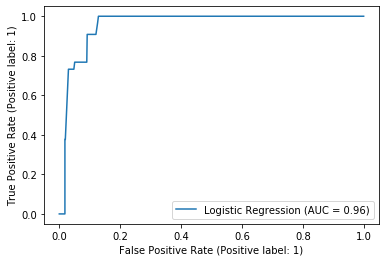

In [52]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(LR, X_test,y_test,name='Logistic Regression')

In [53]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, predictions))

f1_score: 0.9367576243980739


Inferences:

> f1_score is 94.1% with Logistic Regression with L2 penalty and AUC value is 96% that implies, the model is 96% accurate in distinguishing the classes.

##### Logistic Regression using Grid Search CV at various regularization strengths and liblinear solver

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

P_LR = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(penalty='l2',solver='liblinear'))])

params = {'lr__C': [0.01, 0.1, 1, 10,100]}

LR = GridSearchCV(P_LR, param_grid=params, cv=10, scoring='f1', refit=True)
LR = LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)


In [55]:
#calculating the accuracy score on test data and Training data 
predictions=LR.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))
predictions_train = LR.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))

Test score: 0.9325573433755563
Training Score: 0.9311610157052693


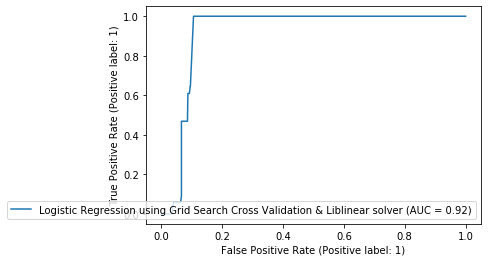

In [57]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(LR, X_test,y_test,name='Logistic Regression using Grid Search Cross Validation & Liblinear solver')

In [58]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, LR_pred))


f1_score: 0.9367576243980739


In [59]:
LR.best_params_

{'lr__C': 0.1}

Inferences:

>Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting.

>f1_score is 94.1% with Logistic Regression with 10 folds Cross Validation,L2 penalty and liblinear solver.

##### Logistic Regression using  Grid Search CV at various regularization strengths and saga solver

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

P_LR = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(solver='saga'))])

params = {'lr__C': [0.01, 0.1, 1, 10,100]}

LR = GridSearchCV(P_LR, param_grid=params, cv=10, scoring='f1', refit=True)
LR = LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)



In [63]:
#calculating the accuracy score on test data and Training data 
predictions=LR.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))
predictions_train = LR.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))

Test score: 0.9325573433755563
Training Score: 0.9311610157052693


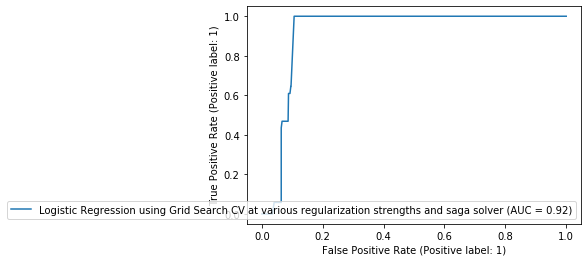

In [64]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(LR, X_test,y_test,name='Logistic Regression using Grid Search CV at various regularization strengths and saga solver')

In [65]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, LR_pred))

f1_score: 0.9367576243980739


In [88]:
LR.best_params_

{'lr__C': 0.1}

Inferences:

>Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting.

>f1_score is 94.1% with Logistic Regression with 10 folds Cross Validation,L2 penalty and Saga solver.

### Prediction using  K-Nearest Neighbours 

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

knn_m= Pipeline([('processing', processing_pipeline),('model', KNeighborsClassifier())])

param_grid = [
  {'model__n_neighbors': [1, 3, 7, 10, 15], 'model__weights': ['uniform','distance']}
 ]

knn_results = GridSearchCV(estimator=knn_m, param_grid=param_grid, scoring='f1', refit=True, cv=5)
knn_results = knn_results.fit(X_train, y_train)

In [68]:
#calculating the accuracy score on test data and Training data 
predictions_train = knn_results.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))
predictions=knn_results.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

Training Score: 0.9898723029502422
Test score: 0.9887024991441288


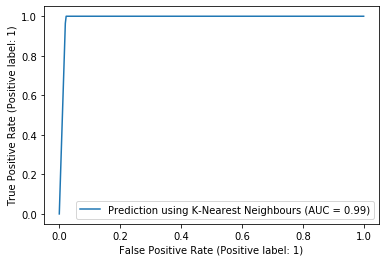

In [69]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(knn_results, X_test,y_test,name='Prediction using K-Nearest Neighbours')

In [70]:
knn_results_p= knn_results.predict(X_test)
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, knn_results_p))

f1_score: 0.9888173500508303


In [92]:
knn_results.best_params_

{'model__n_neighbors': 1, 'model__weights': 'uniform'}

Inferences:

> Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting.

> f1_score is 99.1% using K-Nearest Neighbours, which is better then Logistic regression.

### Prediction using Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p_dt = Pipeline([('processing', processing_pipeline),('dt', DecisionTreeClassifier())])
params = {'dt__max_depth': [1, 5, 10, 15, 25, 50, 100],'dt__min_samples_split': [3, 10, 15]}

dt = GridSearchCV(p_dt, param_grid=params, cv=10, scoring='f1', refit=True)
dt = dt.fit(X_train, y_train)
dt_p = dt.predict(X_test)

In [72]:
#calculating the accuracy score on test data and Training data 
predictions_train = dt.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))
predictions=dt.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

Training Score: 0.9898723029502422
Test score: 0.9887024991441288


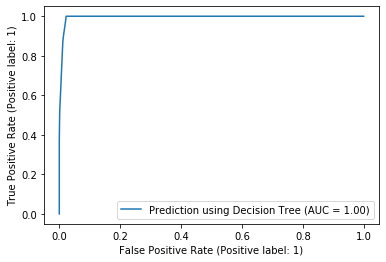

In [73]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(dt, X_test,y_test,name='Prediction using Decision Tree')

In [74]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, dt_p))

f1_score: 0.9888173500508303


In [75]:
dt.best_params_

{'dt__max_depth': 10, 'dt__min_samples_split': 3}

Inferences:

> Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting.

> f1_score is 99.1% using Decision Tree, which is better then Logistic regression and K-Nearest Neighbours.

### Prediction using RandomForest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
p_RF = Pipeline([('processing', processing_pipeline),('RF', RandomForestClassifier())])
#params = {'RF__max_depth': [1, 5, 10, 15],'RF__min_samples_split': [3, 10]}

#RF = GridSearchCV(p_RF, cv=10, scoring='f1', refit=True)
RF = p_RF.fit(X_train, y_train)
RF_p = RF.predict(X_test)

In [77]:
#calculating the accuracy score on test data and Training data 
predictions_train = RF.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))
predictions=RF.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

Training Score: 0.9898723029502422
Test score: 0.9887024991441288


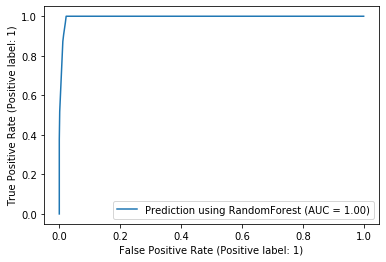

In [79]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(RF, X_test,y_test,name='Prediction using RandomForest')

In [80]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, RF_p))

f1_score: 0.9888173500508303


Inferences:

> Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting.

> f1_score is 99.1% using RandomForest, which is better then Logistic regression and K-Nearest Neighbours and quiet comparable to the decision tree algorithm.

### Prediction using Xgboost

In [81]:
!pip install xgboost

In [83]:
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier
p_xgb = Pipeline([('processing', processing_pipeline),('xgb', xgb.XGBClassifier())])

xgb = p_xgb.fit(X_train, y_train)
xgb_p = xgb.predict(X_test)

In [84]:
#calculating the accuracy score on test data and Training data 
predictions_train = xgb.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))
predictions=xgb.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

Training Score: 0.9898723029502422
Test score: 0.9887024991441288


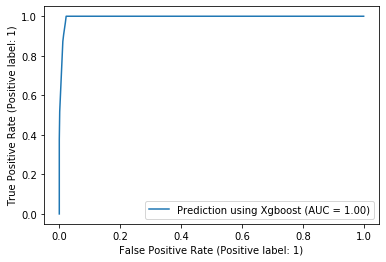

In [85]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(xgb, X_test,y_test,name='Prediction using Xgboost')

In [87]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, xgb_p))

f1_score: 0.9888173500508303


Inferences:

> Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting.

> f1_score is 99.1% using Xgboost classifier, which is better then Logistic regression and K-Nearest Neighbours and quiet comparable to the decision tree and RandomForest algorithm.

### Prediction using SVM


In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
p_svm= Pipeline([('processing', processing_pipeline),('clf', SVC(probability=True))])

In [89]:
# fitting the model 
svm = p_svm.fit(X_train, y_train)
svm_p = svm.predict(X_test)

In [90]:
#calculating the accuracy score on test data and Training data 
predictions_train = svm.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))
predictions=svm.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

Training Score: 0.9631586672537795
Test score: 0.9626840123245464


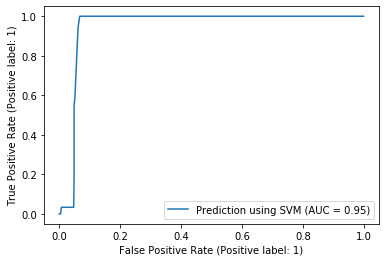

In [91]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(svm, X_test,y_test,name='Prediction using SVM')

In [92]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, svm_p))

f1_score: 0.96399074991741


Inferences:

>Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting.

>f1_score is 96.9% using SVM classifier, which is better then Logistic regression and K-Nearest Neighbours and lower than decision tree, Xgboost and RandomForest algorithm.


**Explorative Data Analysis Outcomes:**

2021, 2018 are the years with most consumer complaints reported.

January is month with most consumer complaints reported.

2018, 2021 are the years with most consumer complaints settled/resolved.

March, January are the months with most consumer complaints resolved.

Travel Insurances and Home insurances are the most sought after insurance policies.

Disposition type Company Position Substantiated has the highest values in the dataset.

The improper claim settlemets are the primary reason for complaint filings.

2021 is the year with most complaints filed and 2022 is the year with most of them resolved.

Claim handling segment is the most highest segmnet with high recovery amounts then followed by complaints due to marketing and sales segments.

2018 is the year with highest sum of claims recovered.

February is the Month with highest sum of claims recovered.

Compaints are resolved with the highest recovery amounts in Claim handling category.


Machine Learning Outcomes
Evaluation Metric: F-Score

1) The metrics such as Precision, Sensitivity, Recall, Specificity, F-Score, ROC-AUC Curve is used to evaluate the Classification problem.Here, we could observe that the output data is slightly imbalnced, here we could use the F-1 Score. F-1 score is generally useful when working with the imbalanced dataset and it also combines precision with recall into a single metric.

2) f1_score is 94.1% with Logistic Regression with L2 penalty and AUC value is 96% that implies, the model is 96% accurate in distinguishing the classes.

3) f1_score is 94.1% with Logistic Regression with 10 folds Cross Validation,L2 penalty and liblinear solver.

4) f1_score is 94.1% with Logistic Regression with 10 folds Cross Validation,L2 penalty and Saga solver.

5) f1_score is 99.1% using K-Nearest Neighbours, which is better then Logistic regression.

6) f1_score is 99.1% using Decision Tree, which is better then Logistic regression and K-Nearest Neighbours.

7) f1_score is 99.1% using RandomForest, which is better then Logistic regression and K-Nearest Neighbours and quiet comparable to the decision tree algorithm.

8) f1_score is 99.1% using Xgboost classifier, which is better then Logistic regression and K-Nearest Neighbours and quiet comparable to the decision tree and RandomForest algorithm.

9) f1_score is 96.9% using SVM classifier, which is better then Logistic regression and K-Nearest Neighbours and lower than decision tree, Xgboost and RandomForest algorithm.

10) By comparing all the above implemented models, we can conclude that K-Nearest Neighbours, Decision Tree, RandomForest, Xgboost classifiers has improved the performance of the model and any one of the models can be choosed for prtical business applications.

Further Improvements and outcomes:

It's better to have a business understanding of the data and the how seerity the data is. The basic understanding helps in formatting the data and making it suitable for production scale applications and for developing consumer end applications.

Further, the results can be imporved by having vast knowledge on the business doamin, which could be useful in undertsnding and pre-processing the data. Thus, the outliers and any random noise can be removed.

More advanced algorithms like CNN, Neural networks along with Tensor-flow models can imporve the performance of the model.